## 1. Simulation of stochastic process

---

### 1.1 Brownian motion

A standard Brownian motion (a.k.a. Wiener process) is a stochastic process $W=(W_t)_{0\leq t\leq T}$ such that:

1. $W_{0}=0$
2. $t\mapsto W_t$ is almost surely (a.s.) continuous
3. $W$ has independent increments:
    - For any $0\leq s_1\leq t_1\leq s_2\leq t_2$, the increments $W_{t_2}-W_{s_2}$ and $W_{t_1}-W_{s_1}$ are independent.
4. $W$ has Gaussian increments:
    - For any $0\leq s\leq t$, the increment $W_t-W_s$ follows a Gaussian distribution with mean $0$ and variance $t-s$

$$
W_t-W_s\sim\mathcal{N}(0,t-s)
$$


---

### 1.2 Simulate a Brownian motion

In order to simulate a stochastic process, we first need to perform a time discretization. 

Introduce the time grid $\mathcal{T}=\{t_0,t_1,\ldots,t_N\}$ such that $t_n=n\times\Delta_t$ where $\Delta_t:=\frac{T}{N}$.

Drawing a Monte Carlo path from a Brownian motion can be achieved as follows:

1. Simulate $N$ independent draws $G_n, n = 1, ..., N$ from a standard Gaussian variable

2. Set $W_{t_0} = 0$ and for every $n = 0, 1, ..., N - 1$, define:

$$
W_{t_{n+1}}=W_{t_n}+\sqrt{\Delta_t}G_n
$$


---

### 1.3 Simulating multiple BM paths


Generating Brownian paths: 100%|██████████| 100/100 [00:00<00:00, 1215.91step/s]


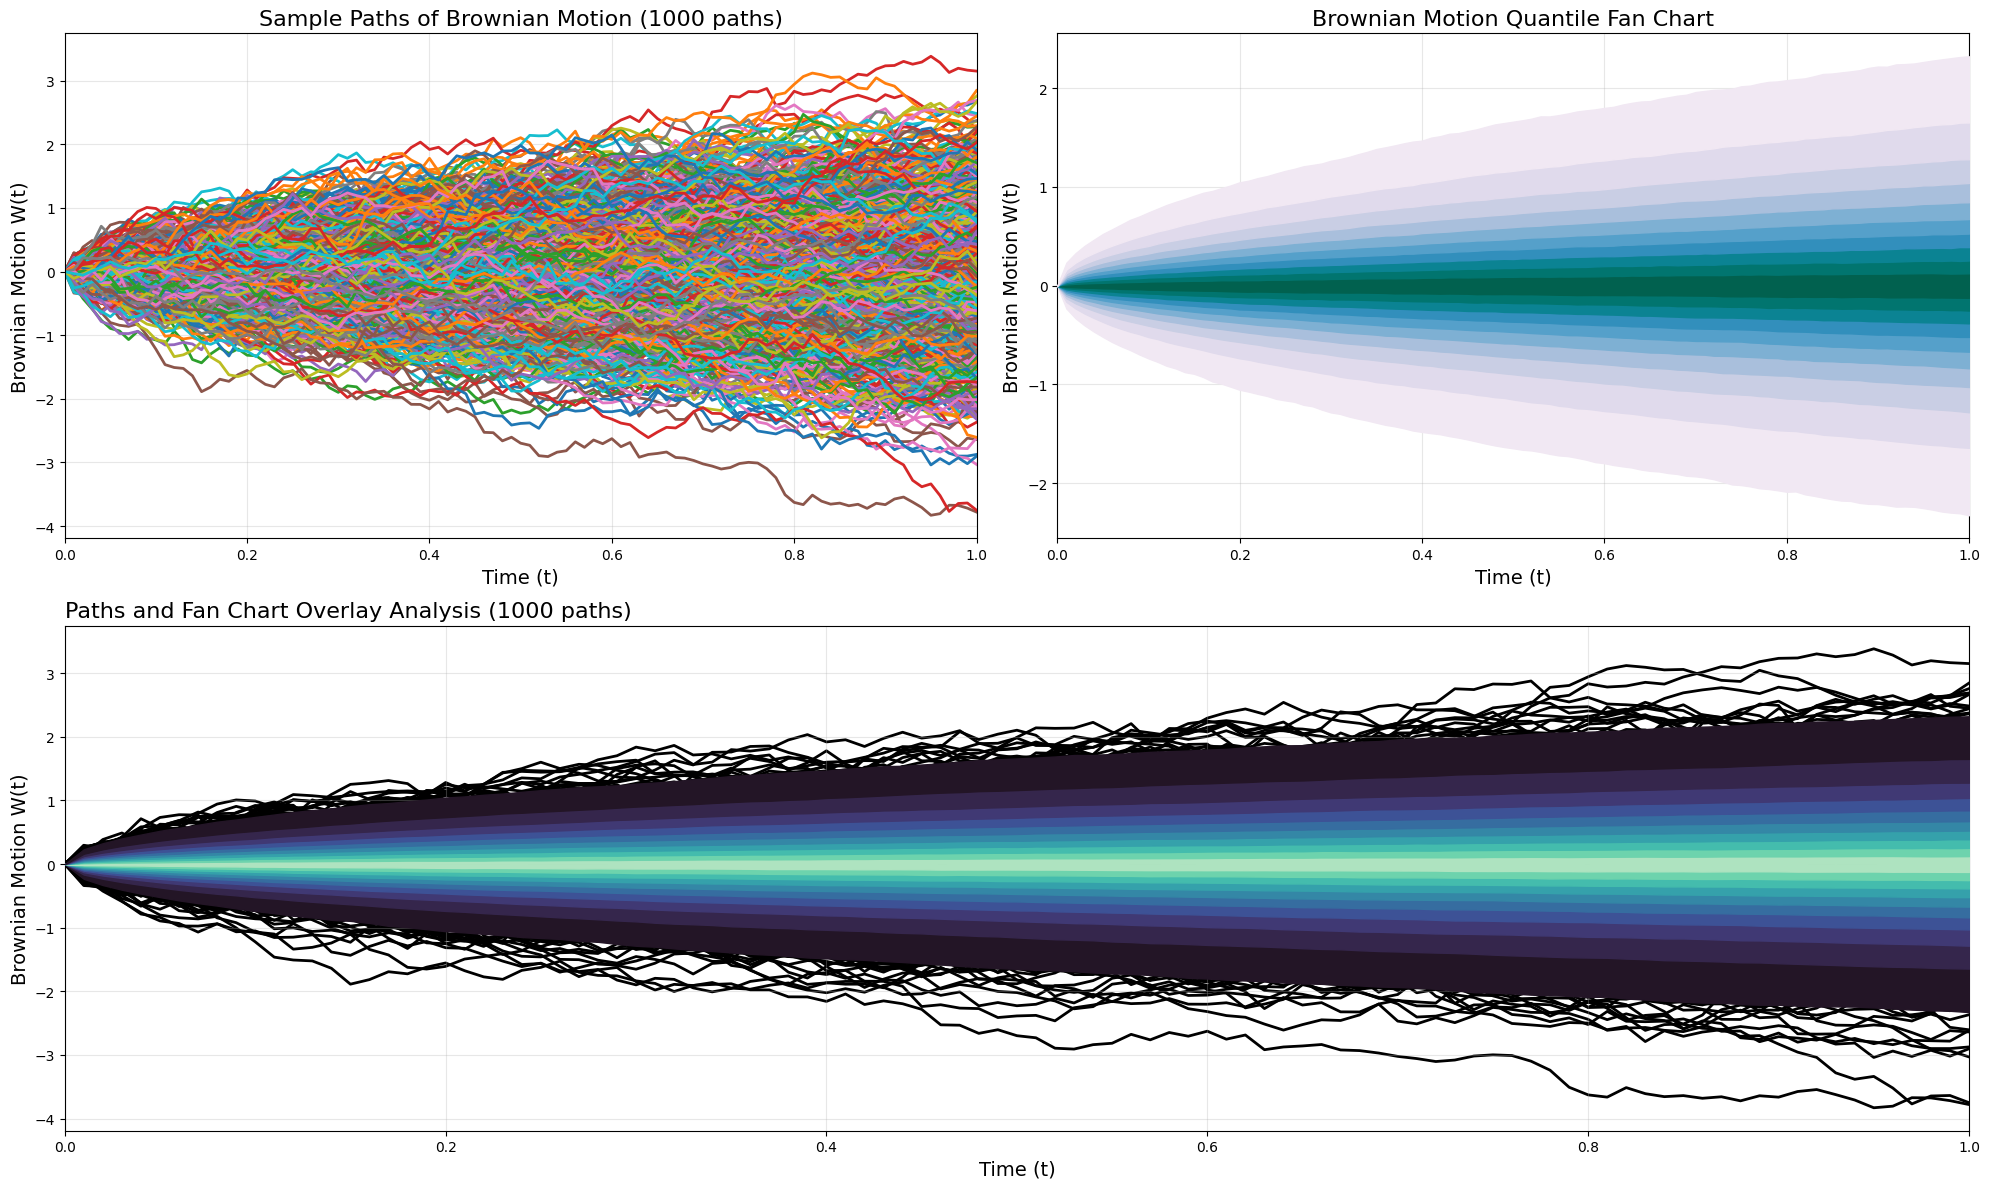

In [2]:
import numpy as np
from scipy.stats import norm, cauchy
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns

def generate_brownian_motion(T = 1.0, N = 100, M = 10_000, init = 0.0) -> tuple:
    """
    生成布朗运动路径
    
    参数:
    T: 总时间长度
    N: 时间步数
    M: 模拟的路径数量
    init: 初始值 (默认值: 0.0)
    
    返回:
    t: 时间点数组，形状为 (N+1,)
    W: 布朗运动路径矩阵，形状为 (N+1, M)
    """
    dt = T / N
    sqrtdt = np.sqrt(dt)
    
    # 初始化存储矩阵：行代表时间，列代表不同路径
    W = np.zeros([N+1, M])
    W[0, :] = init
    
    for n in tqdm.tqdm(range(N), desc = "Generating Brownian paths", unit = "step"):
        W[n+1, :] = W[n, :] + sqrtdt * norm.rvs(size = M)
    
    t = np.linspace(0, T, N + 1)
    
    return (t, W)

def plot_comprehensive_brownian_analysis(t, W, T = 1.0, num_paths = 5, n_band = 10):
    """
    绘制随机运动的综合分析图
    
    参数:
    t: 时间点数组
    W: 布朗运动路径矩阵
    T: 总时间长度
    num_paths: 显示的样本路径数量
    n_band: 扇形图的颜色带数量
    """
    fig = plt.figure(figsize = (20, 12))

    ax1 = plt.subplot(2, 2, 1)
    ax2 = plt.subplot(2, 2, 2)
    ax3 = plt.subplot(2, 1, 2)
    
    # 样本路径图
    for i in range(min(num_paths, W.shape[1])):
        ax1.plot(t, W[:, i], linewidth=2)
    ax1.set_xlim([0, T])
    ax1.set_xlabel('Time (t)', fontsize = 14)
    ax1.set_ylabel('Brownian Motion W(t)', fontsize = 14)
    ax1.set_title(f'Sample Paths of Brownian Motion ({min(num_paths, W.shape[1])} paths)', fontsize = 16)
    ax1.grid(True, alpha=0.3)
    
    # 扇形图
    col1 = sns.color_palette("PuBuGn_r", n_band // 2)
    q_val = np.linspace(0.0, 1.0, n_band + 1)
    q_val[0] = 0.01
    q_val[-1] = 0.99
    Q = np.quantile(W, q_val, axis = 1)
    for i in range(n_band):
        col_idx = np.abs(int(i - n_band // 2 + 0.5))
        ax2.fill_between(t, Q[i+1, :], Q[i, :], color = col1[col_idx], zorder = 20)
    ax2.set_xlim([0, T])
    ax2.set_xlabel('Time (t)', fontsize = 14)
    ax2.set_ylabel('Brownian Motion W(t)', fontsize = 14)
    ax2.set_title("Brownian Motion Quantile Fan Chart", fontsize = 16)
    ax2.grid(True, alpha = 0.3)
    
    # 路径叠加扇形图
    col2 = sns.color_palette("mako_r", n_band // 2)
    M_display = min(num_paths, W.shape[1])
    for i in range(M_display):
        ax3.plot(t, W[:, i], color = "black", linewidth = 2, alpha = 1, zorder = 1)     # zorder 值越大的元素，会被绘制在越上层
    for i in range(n_band):
        col_idx = np.abs(int(i - n_band // 2 + 0.5))
        ax3.fill_between(t, Q[i+1, :], Q[i, :], color = col2[col_idx], zorder = 20, alpha = 1)
    ax3.set_xlim([0, T])
    ax3.set_xlabel('Time (t)', fontsize = 14)
    ax3.set_ylabel('Brownian Motion W(t)', fontsize = 14)
    ax3.set_title(f"Paths and Fan Chart Overlay Analysis ({M_display} paths)", fontsize = 16, loc = "left")
    ax3.grid(True, alpha = 0.3)
    
    plt.tight_layout()
    # plt.savefig("comprehensive_brownian_analysis.svg", format = "svg")
    plt.show()

T, N, M, init = 1.0, 100, 50_000, 0.0
num_paths, num_band = 1000, 20
t, X = generate_brownian_motion(T = T, N = N, M = M, init = init)
plot_comprehensive_brownian_analysis(t, X, T = T, num_paths = num_paths, n_band = num_band)


---

### 1.4 Simulate an arithmetic Brownian motion

An $\color{yellow}\text{arithmetic Brownian motion}$ $X=(X_t)_{0\leq t\leq T}$ is the sum of a Brownian motion and a linear drift:

$$
X_t=X_0+\mu t+\sigma W_t
$$
- $\mu$ - drift parameter
- $\sigma$ - volatility parameter

1. Simulate the Brownian motion $W$ as explained before;
2. Multiply these paths by the constant $\sigma$;
3. Add the affine function $X_0 + \mu t$ to each path.


---

### 1.5 Geometric Brownian motion

A stochastic process $S=(S_t)_{0\leq t\leq T}$ is said to follow a $\color{yellow}\text{geometric Brownian motion}$ (GBM) if it is satisfies the following **Stochastic Differential Equation** (SDE):

$$
dS_t=\mu S_tdt+\sigma S_tdW_t
$$

- Starting from a fixed value $S_0 > 0$
- $\mu$ - Drift parameter
- $\sigma$ - Volatility parameter
- $W = (W_t)_{0\leqslant t\leqslant T}$ - Brownian motion

$$
S_t=S_0+\int_0^t\mu S_udu+\int_0^t\sigma S_udW_u
$$

This SDE is known to admit the following strong solution:

$$
\color{yellow}
S_t=S_0\exp\left(\left(\mu-\frac{\sigma^2}{2}\right)t+\sigma W_t\right)
$$


---

### 1.6 Simulate a geometric Brownian motion

The best way to simulate a GBM is to take advantage of the strong solution of the GBM SDE:

1. Simulate the arithmetic Brownian motion as explained before:

$$
\left(\mu-\frac{\sigma^2}{2}\right)t+\sigma W_t
$$

2. Take the exponential of each path and multiply the results by $S_0$


---

### 1.7 General Stochastic Differential Equation

Let the stochastic process $S=(S_t)_{0\leq t\leq T}$ be the solution of the following general stochastic differential equation:

$$
dS_t=\mu(t,S_t)dt+\sigma(t,S_t)dW_t
$$

- Starting from a fixed value $S_0 > 0$
- $\mu, \sigma$ - Real functions
- $W=(W_t)_{0\leq t\leq T}$ - Brownian motion

> For the solution $S$ to exist, the two functions $\mu$ and $\sigma$ must satisfy some regularity conditions (for example Lipschitz-continuity).

In the general case, a general SDE of this type does not admit an explicit strong solution. 

We thus need to use a simulation algorithm which does not require the knowledge of the solution of the SDE.


---

### 1.8 Simulate an SDE - Euler Scheme

The easiest and most popular way to simulate an SDE is the $\color{yellow}\text{Euler time discretization scheme}$. 

We use the same time grid as before $\mathcal{T}=\{t_0,t_1,\ldots,t_N\}$ such that $t_n=n\times\Delta_t$ where $\Delta_t:=\frac{T}{N}$.

The Euler scheme works as follows:

$$
S_{t_{n+1}}=S_{t_n}+\mu(t_n,S_{t_n})\Delta_t+\sigma(t_n,S_{t_n})(W_{t_{n+1}}-W_{t_n})
$$
- Starting from a fixed value $S_{t_0} = S_0$

To implement it in practice, we use the fact that $W_{t_{n+1}}-W_{t_n}\sim\mathcal{N}(0,\Delta_t)$:

$$
S_{t_{n+1}}=S_{t_n}+\mu(t_n,S_{t_n})\Delta_t+\sigma(t_n,S_{t_n})\sqrt{\Delta_t}G_n
$$
- $G_n, n = 1, ..., N$ - $N$ independent standard Gaussian variables.


---

### 1.9 Time discretization error of Euler scheme

The Euler scheme provides an approximation of the (usually intractable) solution of the SDE:

$$
dS_t=\mu(t,S_t)dt+\sigma(t,S_t)dW_t
$$

Under appropriate regularity conditions of $\mu$ and $\sigma$ , the $\color{yellow}\text{discretization error}$ (which is a type of **truncation error**) between the solution SDE and the Euler approximation can be shown to be $O(\sqrt{\Delta_t})$

The smaller the time step $\Delta_t$, the smaller the discretization error of the Euler scheme. 

In other words, reducing the error between the solution of the SDE and its Euler approximation requires to set the number of time steps $N$ as large as possible, which can quickly become impractical numerically.


---

### 1.10 Time discretization error is not a critical issue

There are higher order schemes that reduce this discretization error.

But we need to remember what our goals are.

The SDE itself is only a model; modeling prices in continuous time is mathematically more convenient, but it is in itself an approximation of reality since prices do not change continuously.

As a result, the time discretization "error" is not a concern at all for practitioners who favour the simple Euler scheme, so much so that it is possible to claim that $\color{yellow}\text{the Euler scheme IS the model}$.


---

<img src="./image/stochastic_process.png" alt="image.png" style="width: 1200px; height: auto; display: block; margin: 0 auto;">

---

#### 1.10.1 Arithmetic Brownian motion

Generating Arithmetic Brownian paths: 100%|██████████| 100/100 [00:00<00:00, 895.06step/s]


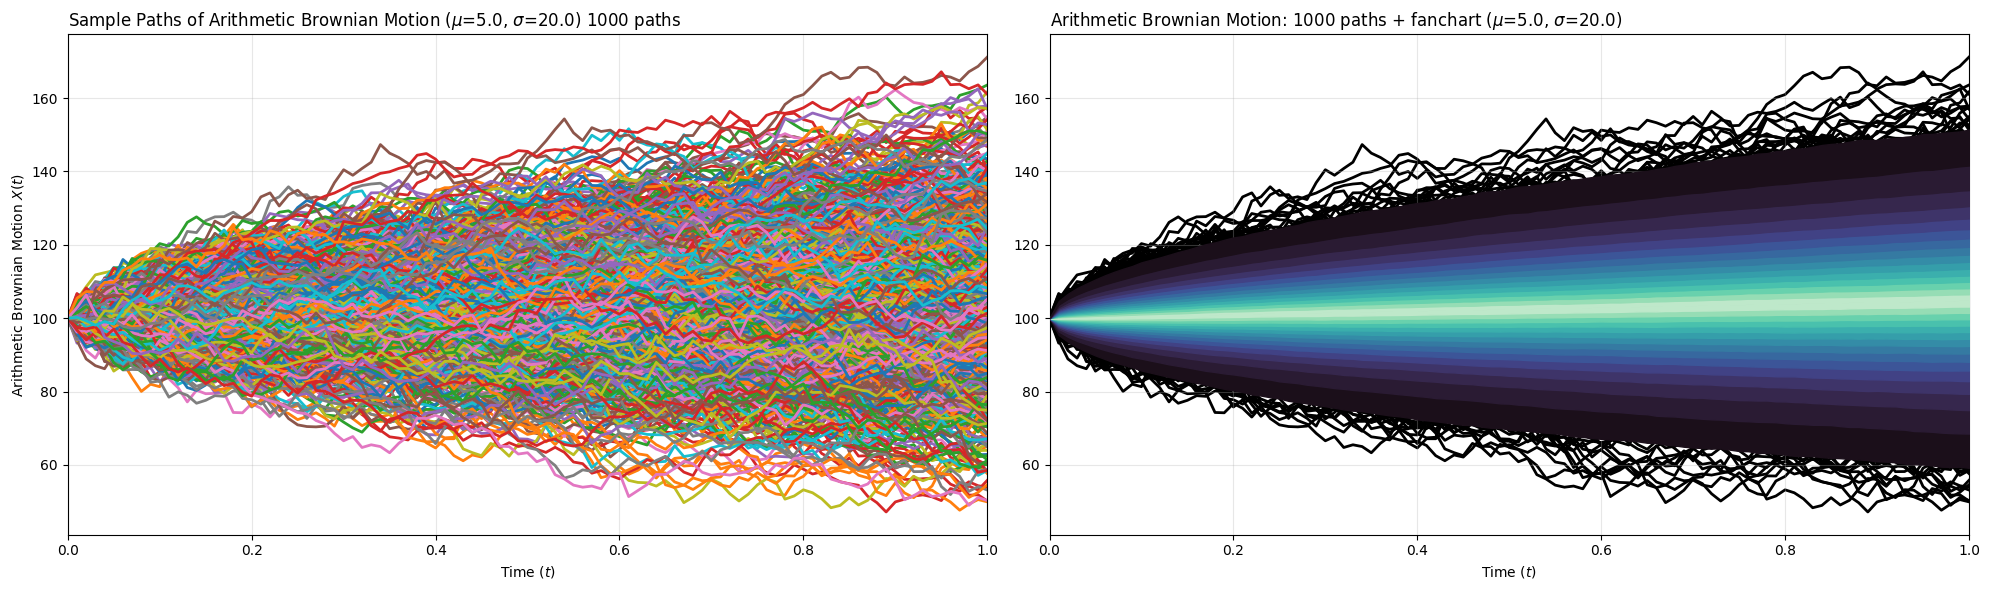

In [3]:
def generate_arithmetic_brownian_motion(T = 1.0, N = 100, M = 10_000, init = 0.0, mu = 0.0, sigma = 1.0) -> tuple:
    """
    生成算术布朗运动路径
    
    参数:
    T: 总时间长度
    N: 时间步数
    M: 模拟的路径数量
    init: 初始值 (默认值: 0.0)
    mu: 漂移系数 (默认值: 0.0)
    sigma: 波动率系数 (默认值: 1.0)
    
    返回:
    t: 时间点数组，形状为 (N+1,)
    W: 路径矩阵，形状为 (N+1, M)。对于标准布朗运动，W 表示 W_t；对于算术布朗运动，W 表示 S_t。
    """
    dt = T / N
    sqrtdt = np.sqrt(dt)
    
    # 初始化存储矩阵：行代表时间，列代表不同路径
    X = np.zeros([N + 1, M])
    X[0, :] = init
    
    for n in tqdm.tqdm(range(N), desc = "Generating Arithmetic Brownian paths", unit = "step"):
        X[n + 1, :] = X[n, :] + mu * dt + sigma * sqrtdt * norm.rvs(size = M)
    
    t = np.linspace(0, T, N + 1)
    
    return (t, X)

def plot_comprehensive_arithmetic_brownian_analysis(t, X, T=1.0, num_paths=5, n_band=10, mu=0.1, sigma=0.2):
    """
    绘制算术布朗运动的综合分析图
    
    参数:
    t: 时间点数组
    X: 算术布朗运动路径矩阵
    T: 总时间长度
    num_paths: 显示的样本路径数量
    n_band: 扇形图的颜色带数量
    mu: 漂移系数 (用于标题显示)
    sigma: 波动率系数 (用于标题显示)
    """
    fig = plt.figure(figsize=(20, 6))

    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    # 样本路径图
    for i in range(min(num_paths, X.shape[1])):
        ax1.plot(t, X[:, i], linewidth = 2)
    ax1.set_xlim([0, T])
    ax1.set_xlabel('Time ($t$)')
    ax1.set_ylabel('Arithmetic Brownian Motion $X(t)$')
    ax1.set_title(f'Sample Paths of Arithmetic Brownian Motion ($\\mu$={mu}, $\\sigma$={sigma}) {min(num_paths, X.shape[1])} paths', loc="left")
    ax1.grid(True, alpha=0.3)
    
    # 路径叠加扇形图
    col1 = sns.color_palette("mako_r", n_band // 2)
    M_display = min(num_paths, X.shape[1])
    # 分位数计算
    q_val = np.linspace(0.0, 1.0, n_band + 1)
    q_val[0] = 0.01
    q_val[-1] = 0.99
    Q = np.quantile(X, q_val, axis=1)
    # 路径绘制
    for i in range(M_display):
        ax2.plot(t, X[:, i], color="black", linewidth=2, alpha=1, zorder=1)
    for i in range(n_band):
        col_idx = np.abs(int(i - n_band // 2 + 0.5))
        ax2.fill_between(t, Q[i+1, :], Q[i, :], color=col1[col_idx], zorder=20, alpha=1)
    ax2.set_xlim([0, T])
    ax2.set_xlabel('Time ($t$)')
    ax2.set_title(f"Arithmetic Brownian Motion: {M_display} paths + fanchart ($\\mu$={mu}, $\\sigma$={sigma})", loc="left")
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    # plt.savefig("comprehensive_arithmetic_brownian_analysis.svg", format="svg")
    plt.show()

T, N, M, init = 1.0, 100, 50_000, 100
mu, sigma = 5.0, 20.0
num_paths, num_band = 1000, 30

t, X = generate_arithmetic_brownian_motion(T = T, N = N, M = M, init = init, mu = mu, sigma = sigma)
plot_comprehensive_arithmetic_brownian_analysis(t, X, T = T, num_paths = num_paths, n_band = num_band, mu = mu, sigma = sigma)

---

## 2. Simulation of correlated stochastic processes

### 2.1 Correlated Brownian motions

- $W=(W_t)_{0\leqslant t\leqslant T}$, $B=(B_t)_{0\leqslant t\leqslant T}$ - Two standard Brownian motions

If $\forall 0\leqslant s < t$,
$$
\mathbb{C}\mathrm{orr}\left(W_t-W_s,B_t-B_s\right)={\color{yellow}\rho}
$$
then, $W$, $B$ are $\color{yellow}\text{correlated Brownian motions}$ with constant correlation $\color{yellow}\rho$

In particular,
$$
\mathbb{C}\mathrm{ov}\left(W_t-W_s,B_t-B_s\right) = {\color{yellow}\rho}(t-s)
$$

$(W_t-W_s,B_t-B_s)$ - The random vector follows a bivariate Gaussian distribution:
$$
\begin{bmatrix}W_t-W_s\\B_t-B_s\end{bmatrix}\sim\mathcal{N}\left(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}t-s&\rho(t-s)\\\rho(t-s)&t-s\end{bmatrix}\right)
$$


---

### 2.2 Simulate correlated Brownian motions

- Time grid $\mathcal{T}=\{t_0,t_1,\ldots,t_N\}$, s.t., $t_n=n\times\Delta_t$, where $\Delta_t:=\frac{T}{N}$

1. Simulate $N$ independent draws $(G_n, H_n)$, $n = 1, ..., N$ from a bivariate standard Gaussian vector

2. Set $W_{t_0}=B_{t_0}=0$, and $\forall \, n = 0, 1, ..., N - 1$:
$$
\begin{aligned}
&W_{t_{n+1}} = W_{t_n}+\sqrt{\Delta_t}G_n \\ 
&B_{t_{n+1}} = B_{t_n}+\sqrt{\Delta_t}\left({\color{yellow}\rho} G_n + \sqrt{1 - {\color{yellow}\rho}^2}H_n\right)
\end{aligned}
$$


---

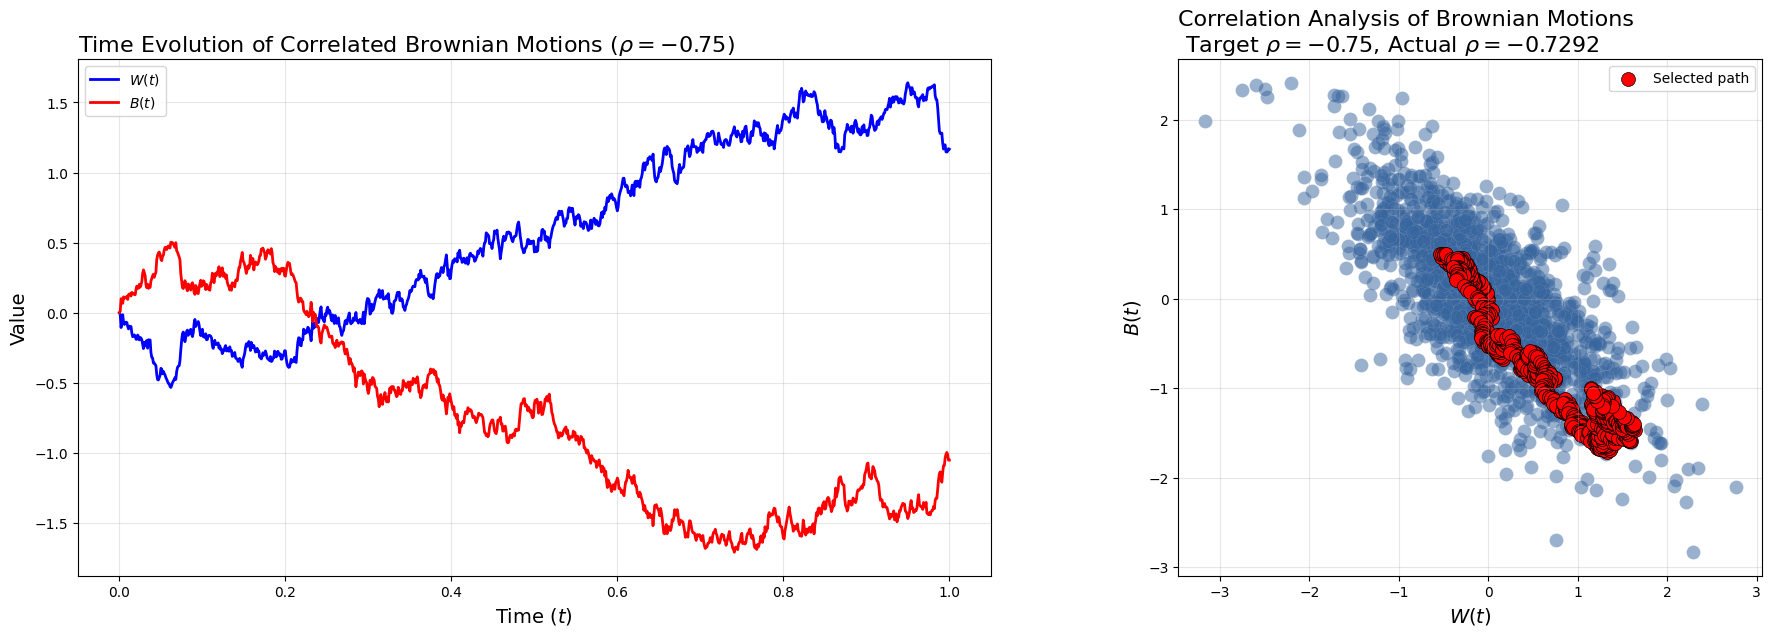

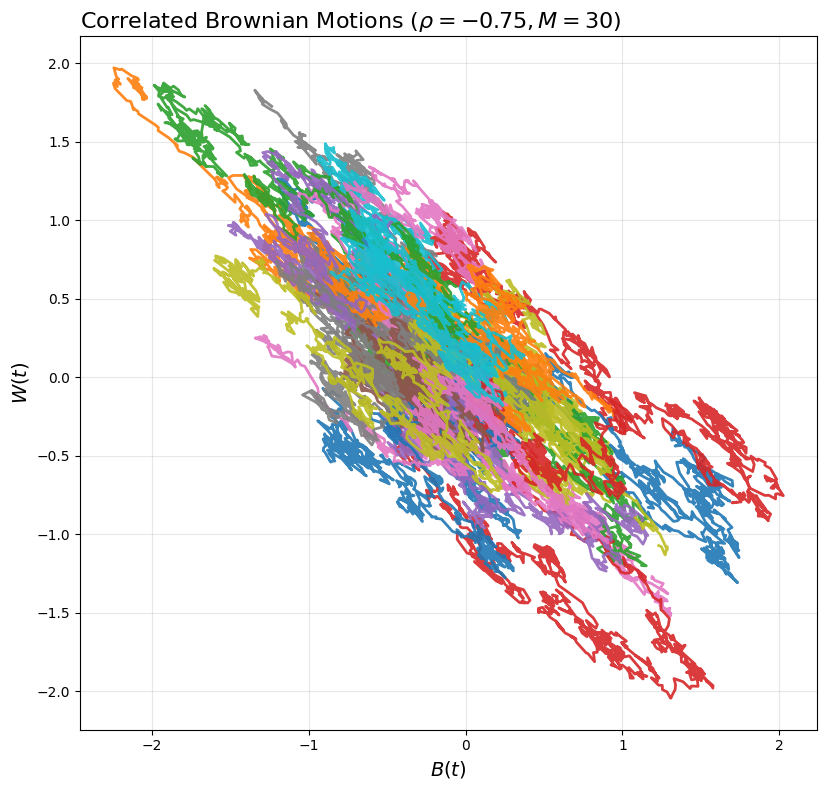

In [4]:
def generate_correlated_brownian_motions(T = 1.0, N = 1000, M = 100, rho = 0.0):
    """
    生成两个相关的布朗运动路径
    
    参数:
    T: 总时间长度
    N: 时间步数
    M: 模拟的路径数量（蒙特卡洛模拟）
    rho: 相关系数
    
    返回:
    t: 时间点数组，形状为 (N+1,)
    W: 第一个布朗运动路径矩阵，形状为 (N+1, M)
    B: 第二个布朗运动路径矩阵，形状为 (N+1, M)
    """
    dt = T / N
    sqrtdt = np.sqrt(dt)
    
    # 初始化存储矩阵
    W = np.zeros([N + 1, M])
    B = np.zeros([N + 1, M])
    
    # 生成相关布朗运动路径
    for n in range(N):
        # 生成独立的标准正态随机变量
        G = norm.rvs(size = M)
        H = norm.rvs(size = M)
        
        # 更新路径
        W[n + 1, :] = W[n, :] + sqrtdt * G
        B[n + 1, :] = B[n, :] + sqrtdt * (rho * G + np.sqrt(1 - rho**2) * H)
    
    t = np.linspace(0, T, N + 1)
    
    return t, W, B

def plot_single_path_comparison_simple(t, W, B, rho, path_idx = None):
    """
    绘制相关布朗运动的单条路径对比分析图
    
    该函数生成两个子图：
    1. 时间序列图：显示随机选择的单条路径中两个相关布朗运动的时间演化
    2. 散点图：展示所有路径中两个布朗运动值的相关性，并突出显示选中的路径
    
    参数:
    t: 时间点数组
    W: 第一个布朗运动路径矩阵
    B: 第二个布朗运动路径矩阵
    rho: float: 相关系数，范围[-1, 1]
    path_idx: 指定的路径索引，如果为None则随机选择一条
    """
    # 随机选择一条路径（如果未指定）
    if path_idx is None:
        path_idx = np.random.randint(0, W.shape[1])
    
    # 创建图形和子图
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
    # 1. 单条路径的时间序列对比
    axes[0].plot(t, W[:, path_idx], linewidth = 2, label=f'$W(t)$', color='blue')
    axes[0].plot(t, B[:, path_idx], linewidth = 2, label=f'$B(t)$', color='red')
    axes[0].set_xlabel('Time ($t$)', fontsize = 14)
    axes[0].set_ylabel('Value', fontsize = 14)
    axes[0].set_title(f'Time Evolution of Correlated Brownian Motions ($\\rho = {rho}$)', loc='left', fontsize = 16)
    axes[0].legend()
    axes[0].grid(True, alpha = 0.3)
    
    # 2. 两个布朗运动值的对比图（散点图）- 所有时间点
    W_flat = W.flatten()
    B_flat = B.flatten()
    actual_rho = np.corrcoef(W_flat, B_flat)[0, 1]  # 计算实际相关系数
    # 绘制散点图（抽样以减少重叠）
    sample_size = min(2_000, len(W_flat))
    indices = np.random.choice(len(W_flat), sample_size, replace = False)
    axes[1].scatter(
        W_flat[indices], B_flat[indices], 
        alpha = 0.5, s = 100, linewidth = 0.1,
        color = sns.color_palette("mako")[2], edgecolor = "white"
    )
    axes[1].set_aspect('equal', 'box')
    axes[1].set_xlabel('$W(t)$', fontsize = 14)
    axes[1].set_ylabel('$B(t)$', fontsize = 14)
    axes[1].set_title(f'Correlation Analysis of Brownian Motions \n Target $\\rho = {rho}$, Actual $\\rho = {actual_rho:.4f}$', loc='left', fontsize = 16)
    axes[1].grid(True, alpha = 0.3)
    # 标记选中的路径的所有点
    axes[1].scatter(
        W[:, path_idx], B[:, path_idx], 
        label = 'Selected path',
        s = 100, linewidth = 0.5,
        color = 'red', edgecolor = 'black'
    )
    axes[1].legend()
    
    plt.tight_layout(pad = 3, w_pad = 1.0)
    # plt.savefig("correlated_brownian_motions_comparison.svg", format = "svg")
    plt.show()

def plot_correlated_brownian_motions(t, W, B, rho, M):
    """
    绘制相关布朗运动的散点图
    
    参数:
    t: 时间点数组
    W: 第一个布朗运动路径矩阵
    B: 第二个布朗运动路径矩阵
    rho: 相关系数
    M: 路径数量
    """
    fig, ax = plt.subplots(1, 1, figsize = (10, 8))
    
    # 两个布朗运动的散点图
    num_paths_to_show = min(30, M)
    for i in range(num_paths_to_show):
        ax.plot(B[:, i], W[:, i], linewidth = 2, alpha = 0.9)
    # ax.set_xlim([-3.5, 3.5])
    # ax.set_ylim([-3.5, 3.5])
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('$B(t)$', fontsize = 14)
    ax.set_ylabel('$W(t)$', fontsize = 14)
    ax.set_title(f'Correlated Brownian Motions ($\\rho = {rho}, M = {num_paths_to_show}$)', loc='left', fontsize = 16)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    # plt.savefig("correlated_brownian_motions.svg", format = "svg")
    plt.show()

T, N, M, rho = 1.0, 1000, 1000, -0.75
t, W, B = generate_correlated_brownian_motions(T = T, N = N, M = M, rho = rho)
plot_single_path_comparison_simple(t, W, B, rho)
plot_correlated_brownian_motions(t, W, B, rho, M)

---

### 2.3 Stochastic volatility models

A one-factor $\color{yellow}\text{stochastic volatility model}$ is the solution $({\color{yellow}S}, {\color{red}V})$ of a bivariate SDE of the type:

$$
\begin{aligned}
&d{\color{yellow}S}_t = \mu(t,{\color{yellow}S}_t)dt + \sigma(t,{\color{yellow}S}_t,V_t)dW_t \\
&d{\color{red}V}_t = \alpha(t,{\color{red}V}_t)dt + \lambda(t,{\color{red}V}_t)dB_t \\
&d \langle W,B \rangle_t = \rho dt
\end{aligned}
$$
- Starting from a fixed value $({\color{yellow}S}_0, {\color{red}V}_0)$
- $\mu, \sigma, \alpha, \lambda$ - Real functions
- $(W,B)=(W_t,B_t)_{0\leqslant t\leqslant T}$ - Correlated bivariate Brownian motion

1. ${\color{yellow}S}$ - Asset price process
2. ${\color{red}V}$ - Variance/volatility process (depending on the function $\sigma$)
s

---

<img src="./image/stochastic_volatility_model.png" alt="image.png" style="width: 1000px; height: auto; display: block; margin: 0 auto;">

---

### 2.4 Simulate a stochastic volatility model

The solution of a stochastic volatility model can be easily simulated using the $\color{yellow}\text{Euler scheme}$.

- $\mathcal{T}=\{t_0,t_1,\ldots,t_N\}$ - Uniform time grid with $t_n=n\Delta_t$ and $\Delta_t=\frac{T}{N}$

$$
\begin{aligned}
&{\color{yellow}S}_{t_{n+1}} = {\color{yellow}S}_{t_n} + \mu(t_n,{\color{yellow}S}_{t_n})\Delta_t + \sigma(t_n,{\color{yellow}S}_{t_n},{\color{red}V}_{t_n})\left(\sqrt{\Delta_t}G_n\right) \\
&{\color{red}V}_{t_{n+1}} = {\color{red}V}_{t_n} + \alpha(t_n,{\color{red}V}_{t_n})\Delta_t + \lambda(t_n,{\color{red}V}_{t_n})\sqrt{\Delta_t}\left(\rho G_n+\sqrt{1-\rho^2}H_n\right)
\end{aligned}
$$
- Starting from a fixed value $({\color{yellow}S}_0, {\color{red}V}_0)$

where we used the fact that:

$$
\begin{aligned}
&W_{t_{n+1}} - W_{t_n} = \sqrt{\Delta_t}G_n \\
&B_{t_{n+1}} - B_{t_n} = \sqrt{\Delta_t}\left(\rho G_n+\sqrt{1-\rho^2}H_n\right)
\end{aligned}
$$






---

## 3. Monte Carlo method for option pricing

### 3.1 Strong law of large numbers

- $X_1,X_2,\ldots,X_M$ - $M$ independent and identically distributed random variables with finite expectation $\mu=\mathbb{E}[X]$.

$$
\Large
\color{yellow}
\lim_{M\to\infty}\frac{1}{M}\sum_{m=1}^MX_m\xrightarrow{a.s.}\mathbb{E}[X]
$$

This is the cornerstone of the Monte Carlo method, which holds as long as the mean of the random variable exists and is finite, which is the case for the vast majority of classical distributions. 

Often, we are interested in the expectation $\mathbb{E}[f(X)]$ of a functional $f$ of a random variable $X$, which can be estimated by $\displaystyle \frac{1}{M}\sum_{m=1}^Mf(X_m)$


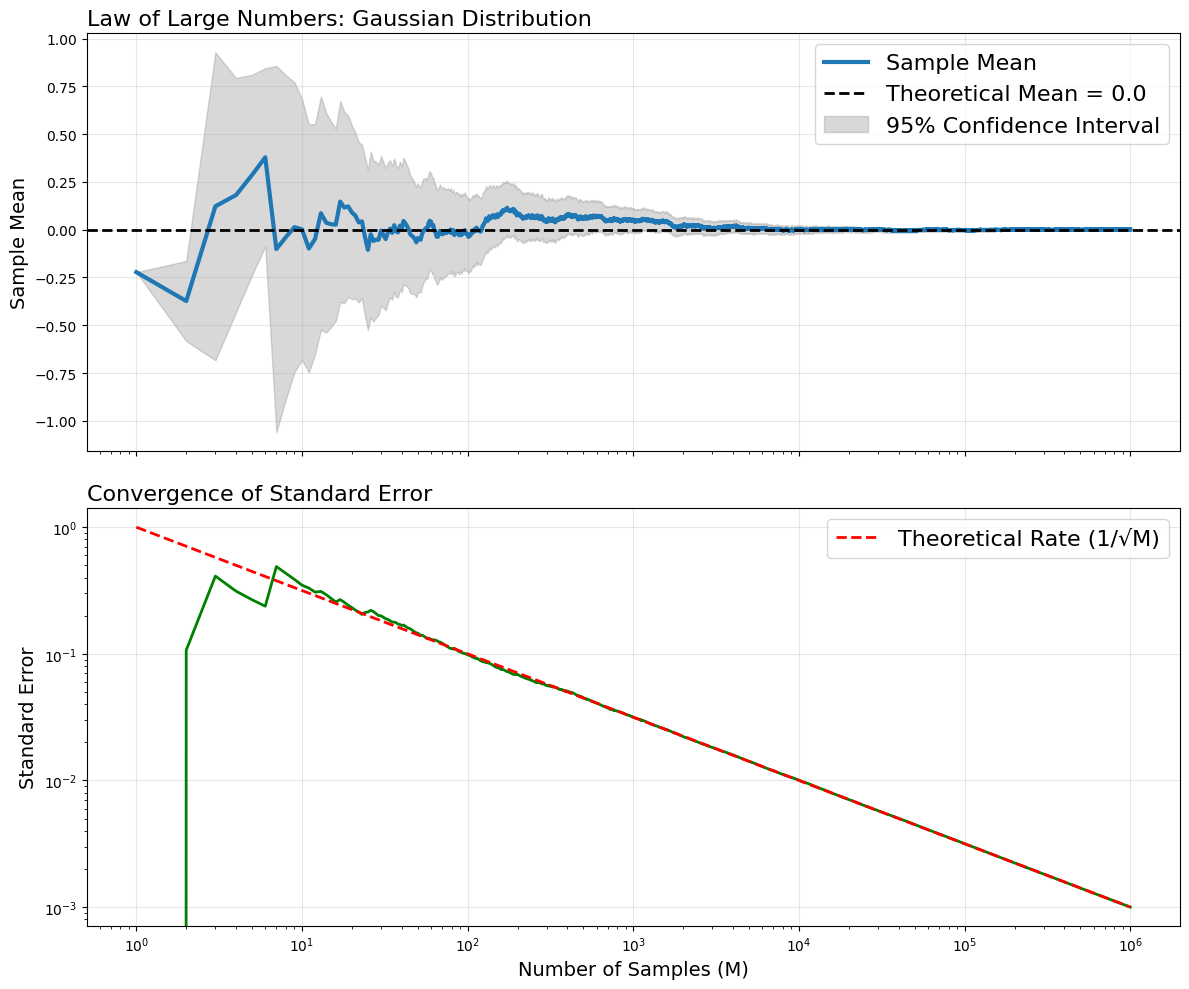

Final Sample Mean: 0.001084
Final Standard Error: 0.001000
Absolute Error: 0.001084


In [5]:
def monte_carlo_convergence_demo(M = 10**6, distribution = 'normal', theoretical_mean = 0.0, confidence_level = 0.95):
    """
    蒙特卡洛方法收敛性演示
    
    通过大数定律展示蒙特卡洛估计的收敛性
    
    参数:
    M: 蒙特卡洛模拟路径数量
    distribution: 分布类型 ('normal' 或 'cauchy')
    theoretical_mean: 理论期望值
    confidence_level: 置信水平 (默认0.95)
    """
    if distribution == 'normal':
        samples = norm.rvs(size = M, loc = theoretical_mean, scale = 1.0)
        dist_name = "Gaussian"
    elif distribution == 'cauchy':
        samples = cauchy.rvs(size = M)
        dist_name = "Cauchy"
    else:
        raise ValueError("Distribution must be 'normal' or 'cauchy'")
    
    # 计算累积统计量
    cumsum = np.cumsum(samples)  # 累积和
    cumsum2 = np.cumsum(samples**2)  # 累积平方和
    Marray = 1 + np.arange(M)  # 样本数量数组 [1, 2, ..., M]
    # 计算样本统计量
    sample_mean = cumsum / Marray  # 样本均值
    sample_variance = cumsum2 / Marray - sample_mean**2  # 样本方差
    standard_error = np.sqrt(sample_variance) / np.sqrt(Marray)  # 标准误
    # 计算置信区间 (仅对正态分布有效)
    if distribution == 'normal':
        # 计算z分数
        z_value = norm.ppf(1 - (1 - confidence_level) / 2)
        confidence_upper = sample_mean + z_value * standard_error
        confidence_lower = sample_mean - z_value * standard_error
    # # 使用对数间隔采样点，减少绘图数据量
    # if M > 10_000:
    #     indices = np.unique(np.logspace(0, np.log10(M - 1), num = min(10_000, M), dtype=int))
    # else:
    #     indices = np.arange(M)
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex = True)
    # 样本均值收敛性
    axes[0].semilogx(Marray, sample_mean, linewidth = 3, label = 'Sample Mean')
    axes[0].axhline(y = theoretical_mean, color = 'black', linestyle = '--', linewidth = 2, label = f'Theoretical Mean = {theoretical_mean}')
    # 添加置信区间 (仅对正态分布)
    if distribution == 'normal':
        axes[0].fill_between(Marray, confidence_lower, confidence_upper, alpha=0.3, color='gray', label=f'{confidence_level*100:.0f}% Confidence Interval')
    axes[0].set_ylabel('Sample Mean', fontsize = 14)
    axes[0].set_title(f'Law of Large Numbers: {dist_name} Distribution', fontsize = 16, loc = 'left')
    axes[0].legend(fontsize = 16)
    axes[0].grid(True, alpha = 0.3)
    # 标准误收敛性 # 衡量样本均值的估计精度 # 样本均值与真实总体均值的可能偏差范围
    axes[1].loglog(Marray, standard_error, linewidth = 2, color = 'green')
    axes[1].set_xlabel('Number of Samples (M)', fontsize = 14)
    axes[1].set_ylabel('Standard Error', fontsize = 14)
    axes[1].set_title('Convergence of Standard Error', fontsize = 16, loc = 'left')
    axes[1].grid(True, alpha = 0.3)
    # 添加理论收敛率参考线 (1/√M)
    if distribution == 'normal':
        theoretical_rate = 1 / np.sqrt(Marray)
        axes[1].loglog(Marray, theoretical_rate, 'r--', linewidth = 2, label='Theoretical Rate (1/√M)')
    axes[1].legend(fontsize = 16)
    plt.tight_layout(h_pad = 2)
    plt.show()
    
    # 打印最终结果
    print(f"Final Sample Mean: {sample_mean[-1]:.6f}")
    print(f"Final Standard Error: {standard_error[-1]:.6f}")
    if distribution == 'normal':
        print(f"Absolute Error: {abs(sample_mean[-1] - theoretical_mean):.6f}")

M, MEAN, CONFIDENCE_LEVEL = 10**6, 0.0, 0.95
DISTRIBUTION = "normal"
monte_carlo_convergence_demo(M = M, distribution = DISTRIBUTION, theoretical_mean = MEAN, confidence_level = CONFIDENCE_LEVEL)

---

### 3.2 Central limit theorem

- $X_1, X_2, ..., X_M$ - $M$ independent and identically distributed random variables with expectation $\mu=\mathbb{E}[X]$ and finite variance $\sigma^2=\mathbb{E}[(X-\mathbb{E}[X])^2]$

$$
\Large
\color{yellow}
Z:=\lim_{M\to\infty}\left(\frac{\frac{1}{M} \displaystyle \sum_{m=1}^MX_m-\mu}{\LARGE\frac{\sigma}{\sqrt{M}}}\right) \quad \xrightarrow{\mathcal{L}} \quad \mathcal{N}(0,1)
$$

This important result states that, with proper scaling, a Monte Carlo estimator converges to a Gaussian distribution when the number of Monte Carlo simulations is large. 

This result can be used to compute $\color{yellow}\text{asymptotic confidence intervals}$.


---

### 3.3 Asymptotic condifence interval

- $\Large \frac{\sigma}{\sqrt{M}}$ - Standard deviation of $\displaystyle \frac{1}{M}\sum_{m=1}^MX_m$

$$
\mathbb{V}\mathrm{ar}\left[\frac{1}{M}\sum_{m=1}^MX_m\right]=\frac{1}{M^2}\mathbb{V}\mathrm{ar}\left[\sum_{m=1}^MX_m\right]=\frac{1}{M^2}M\mathbb{V}\mathrm{ar}\left[X\right]=\frac{\sigma^2}{M}
$$

- $\Phi$ - CDF of the standard Gaussian variable
- $0<\varepsilon\ll1$

A centered confidence interval containing the central $1 - \varepsilon\%$ of a standard Gaussian distribution is given by:

$$
\left[\Phi^{-1}\left(\frac{\varepsilon}{2}\right),\Phi^{-1}\left(1-\frac{\varepsilon}{2}\right)\right]
$$

Indeed, if 
- $Z\sim\mathcal{N}(0,1)$ 
- $\Phi$ - CDF of standard Gaussian

then

$$
\begin{aligned}
\mathbb{P}\left(Z\in\left[\Phi^{-1}\left(\frac{\varepsilon}{2}\right),\Phi^{-1}\left(1-\frac{\varepsilon}{2}\right)\right]\right) & = \mathbb{P}\left(\Phi^{-1}\left(\frac{\varepsilon}{2}\right)\leq Z\leq\Phi^{-1}\left(1-\frac{\varepsilon}{2}\right)\right) \\
& = \mathbb{P}\left(\frac{\varepsilon}{2}\leq\Phi(Z)\leq 1-\frac{\varepsilon}{2}\right) \\
& = \mathbb{P}\left(\Phi(Z)\leq 1-\frac{\varepsilon}{2}\right) - \mathbb{P}\left(\Phi(Z)\leq \frac{\varepsilon}{2}\right)
\end{aligned}
$$

- Fact - $\Phi(Z)\sim\mathcal{U}(0,1)$

The above is the difference between two evaluations of the uniform CDF $F_U$

$$
=F_U\left(1-\frac{\varepsilon}{2}\right)-F_U\left(\frac{\varepsilon}{2}\right) \\
=1-\frac{\varepsilon}{2}-\frac{\varepsilon}{2} \\
=1-\varepsilon
$$

Using this interval $\left[\Phi^{-1}\left(\frac{\varepsilon}{2}\right),\Phi^{-1}\left(1-\frac{\varepsilon}{2}\right)\right]$, we get:

$$
\begin{aligned}
&\mathbb{P}\left(\Phi^{-1}\left(\frac{\varepsilon}{2}\right)\leq Z\leq\Phi^{-1}\left(1-\frac{\varepsilon}{2}\right)\right)=1-\varepsilon \\
&\mathbb{P}\left(\Phi^{-1}\left(\frac{\varepsilon}{2}\right)\leq\frac{\frac{1}{M}\displaystyle\sum_{m=1}^MX_m-\mu}{\frac{\sigma}{\sqrt{M}}}\leq\Phi^{-1}\left(1-\frac{\varepsilon}{2}\right)\right)=1-\varepsilon
\end{aligned}
$$

and finally:

$$
\Large
\color{yellow}
\mathbb{P}\left(\mu+\frac{\sigma}{\sqrt M}\Phi^{-1}\left(\frac{\varepsilon}{2}\right)\leqslant\frac{1}{M}\sum_{m=1}^MX_m\leqslant\mu+\frac{\sigma}{\sqrt M}\Phi^{-1}\left(1-\frac{\varepsilon}{2}\right)\right)
$$

#### Limitations of this confidence interval

1. It is only asymptotic
    - The Gaussian distribution limit is only achieved for $M \to \infin$
    - For fixed $M$ it is only an approximation
    - The larger $M$ and the closer the distribution of $X$ to a Gaussian, the better this approximation
2. Requires the knowledge of the exact mean $\mu$ and the exact standard deviation $\sigma$
    - Often these are unknown and have to be estimated from the dataset
    - This confidence interval is only approximate if $\mu$ and $\sigma$ are replaced by empirical estimates

$\color{yellow}\text{Nevertheless, the main information provided by the central limit theorem is that Monte Carlo estimators converge at a speed proportional to } \LARGE\frac{\sigma}{\sqrt{M}}$





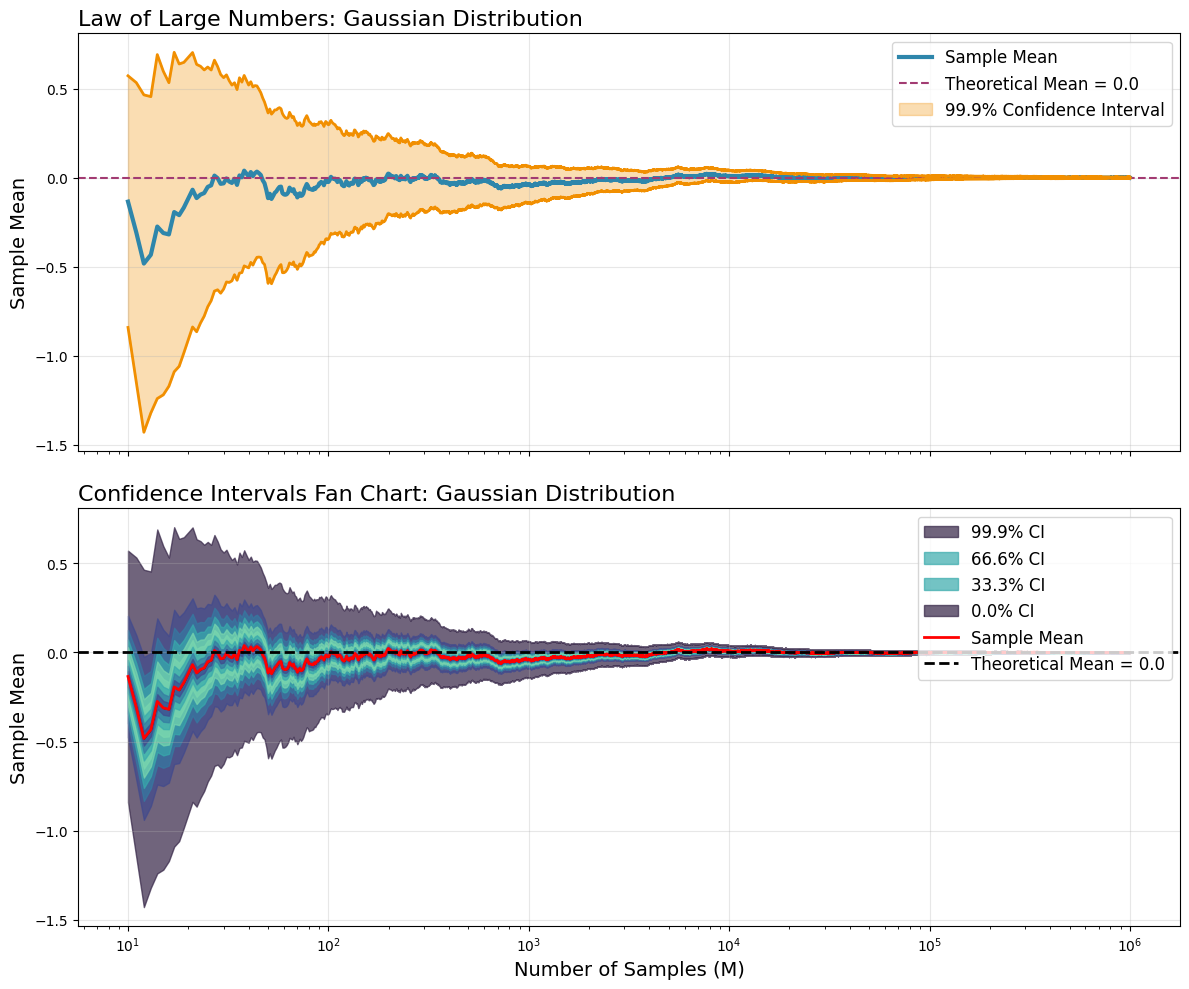

Final Sample Mean: -0.000245
Final Standard Error: 0.000999
Absolute Error: 0.000245


In [35]:
def generate_monte_carlo_data(M = 10**6, distribution = 'normal', theoretical_mean = 0.0, confidence_level = 0.95) -> dict:
    """
    生成蒙特卡洛模拟数据及统计量
    
    参数:
    M: 蒙特卡洛模拟路径数量
    distribution: 分布类型 ('normal' 或 'cauchy')
    theoretical_mean: 理论期望值
    confidence_level: 置信水平 (默认0.95)
    
    返回:
    包含各类统计数据的字典
    """
    # 生成样本
    if distribution == 'normal':
        samples = norm.rvs(size = M, loc = theoretical_mean, scale = 1.0)
        dist_name = "Gaussian"
    elif distribution == 'cauchy':
        samples = cauchy.rvs(size = M)
        dist_name = "Cauchy"
    else:
        raise ValueError("Distribution must be 'normal' or 'cauchy'")
    
    # 计算累积统计量
    cumsum = np.cumsum(samples)  # 累积和
    cumsum2 = np.cumsum(samples**2)  # 累积平方和
    Marray = 1 + np.arange(M)  # 样本数量数组 [1, 2, ..., M]
    
    # 计算样本统计量
    sample_mean = cumsum / Marray  # 样本均值
    sample_variance = cumsum2 / Marray - sample_mean**2  # 样本方差
    standard_error = np.sqrt(sample_variance) / np.sqrt(Marray)  # 标准误
    
    # 从10^1（即10）开始切片数据
    start = 10
    start_idx = start - 1
    Marray = Marray[start_idx:]
    sample_mean = sample_mean[start_idx:]
    sample_variance = sample_variance[start_idx:]
    standard_error = standard_error[start_idx:]
    
    # 计算置信区间
    confidence_upper = None
    confidence_lower = None
    z_value = norm.ppf(1 - (1 - confidence_level) / 2)
    confidence_upper = sample_mean + z_value * standard_error
    confidence_lower = sample_mean - z_value * standard_error
    
    # 整理返回数据
    return {
        'Marray': Marray,
        'sample_mean': sample_mean,
        'sample_variance': sample_variance,
        'standard_error': standard_error,
        'confidence_upper': confidence_upper,
        'confidence_lower': confidence_lower,
        'dist_name': dist_name,
        'theoretical_mean': theoretical_mean,
        'confidence_level': confidence_level,
        'distribution': distribution
    }

def monte_carlo_convergence_demo(data, n_band = 10):
    """
    绘制蒙特卡洛收敛性图表
    
    参数:
    data: generate_monte_carlo_data 返回的字典数据
    """
    # 提取数据
    Marray = data['Marray']
    sample_mean = data['sample_mean']
    standard_error = data['standard_error']
    confidence_upper = data['confidence_upper']
    confidence_lower = data['confidence_lower']
    dist_name = data['dist_name']
    theoretical_mean = data['theoretical_mean']
    confidence_level = data['confidence_level']
    distribution = data['distribution']
    # 为扇形图准备分位数数据
    n_band = 10  # 扇形图颜色带数量
    q_val = np.linspace(0.0, 1.0, n_band + 1)
    q_val[0] = 0.01
    q_val[-1] = 0.99
    
    fig, axes = plt.subplots(2, 1, figsize = (12, 10), sharex = True)
    # 样本均值收敛性
    axes[0].semilogx(Marray, sample_mean, color = "#2E86AB", linewidth = 3, label = 'Sample Mean')
    axes[0].axhline(y = theoretical_mean, color = '#A23B72', linestyle = '--', linewidth = 1.5, label = f'Theoretical Mean = {theoretical_mean}')
    axes[0].fill_between(Marray, confidence_lower, confidence_upper, alpha = 0.3, color = '#F18F01', label = f'{confidence_level*100:.1f}% Confidence Interval')
    axes[0].semilogx(Marray, confidence_upper, color = '#F18F01', linewidth = 2)
    axes[0].semilogx(Marray, confidence_lower, color = '#F18F01', linewidth = 2)
    axes[0].set_ylabel('Sample Mean', fontsize = 14)
    axes[0].set_title(f'Law of Large Numbers: {dist_name} Distribution', fontsize = 16, loc = 'left')
    axes[0].legend(fontsize = 12, loc='upper right')
    axes[0].grid(True, alpha = 0.3)
    
    confidence_levels = np.linspace(0, confidence_level, n_band)
    alpha_levels = [(1 - cl) / 2 for cl in confidence_levels]
    col_palette = sns.color_palette("mako_r", n_band // 2)
    # 从内层（窄区间）到外层（宽区间）填充（反向循环，让高置信度在外侧）
    for i in reversed(range(n_band)):
        z_value = norm.ppf(1 - alpha_levels[i])  # 计算对应置信水平的z值
        upper_band = sample_mean + z_value * standard_error
        lower_band = sample_mean - z_value * standard_error
        col_idx = np.abs(int(i - n_band // 2 + 0.5))
        axes[1].fill_between(Marray, upper_band, lower_band, color=col_palette[col_idx], alpha=0.7, label=f'{confidence_levels[i]*100:.1f}% CI' if i % 3 == 0 else "")
    axes[1].semilogx(Marray, sample_mean, color = "red", linestyle = '-', linewidth = 2, label = 'Sample Mean')
    axes[1].axhline(y=theoretical_mean, color='black', linestyle='--', linewidth=2, label=f'Theoretical Mean = {theoretical_mean}')
    axes[1].set_xlabel('Number of Samples (M)', fontsize=14)
    axes[1].set_ylabel('Sample Mean', fontsize=14)
    axes[1].set_title(f'Confidence Intervals Fan Chart: {dist_name} Distribution', fontsize=16, loc='left')
    axes[1].legend(fontsize=12, loc='upper right')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout(h_pad=2)
    plt.show()
    
    # 打印最终结果
    print(f"Final Sample Mean: {sample_mean[-1]:.6f}")
    print(f"Final Standard Error: {standard_error[-1]:.6f}")
    if distribution == 'normal':
        print(f"Absolute Error: {abs(sample_mean[-1] - theoretical_mean):.6f}")

M, MEAN, CONFIDENCE_LEVEL, DISTRIBUTION, N_BAND = 10**6, 0.0, 0.999, "normal", 5
mc_data = generate_monte_carlo_data(M = M, distribution = DISTRIBUTION, theoretical_mean = MEAN, confidence_level = CONFIDENCE_LEVEL)
monte_carlo_convergence_demo(data = mc_data, n_band = N_BAND)

---

### 3.4 Berry-Esseen theorem

The empirical CDF of a sample $Z_1,Z_2,\ldots,Z_M$ —— $\displaystyle F_M(z):=\frac{1}{M}\sum_{m=1}^M1\{Z_m\leq z\}$

- $X_1,X_2,\ldots,X_M$ —— $M$ independent and identically distributed random variables with:
    - $\mathbb{E}[X]=0$
    - $\mathbb{E}[X^2]=\sigma^2>0$
    - $\mathbb{E}[\left|X\right|^3]=\rho<\infty$

- Sample mean —— $\displaystyle Y_M:=\frac{1}{M}\sum_{m=1}^MX_m$
- $F_M$ —— Empirical CDF of $\LARGE \frac{Y_M}{(\frac{\sigma}{\sqrt{M}})}$

$\exists C > 0$, such that, $\forall \, x \in \R$:

$$
\Large
\color{yellow}
|F_M(x)-\Phi(x)|\leq\frac{C\rho}{\sigma^3\sqrt{M}}
$$
- $\Phi$ —— Standard Gaussian CDF

This result can be used to assess the convergence speed of the central limit theorem.


---

### 3.5 Monte Carlo foundations - Summary

<img src="./image/monte_carlo_fpundations.png" alt="image.png" style="width: 1100px; height: auto; display: block; margin: 0 auto;">

---

### 3.6 Monte Carlo Option Pricing

- $\left(S_{t_n}^m\right)_{n=0,\ldots,N}^{m=1,\ldots,M}$ - $M$ Monte Carlo simulations of a stochastic model $S=(S_t)_{0\leq t\leq T}$
- $f(S_T)$ - Final payoff of a European option

> e.g., 
> - $\begin{aligned}f(S_T)=(S_T-K)^+\end{aligned}$ - Call option
> - $f(S_T)=\underline{(}K-S_T)^+$ - Put option

A Monte Carlo estimator of the price $P_0=\mathbb{E}[e^{-rT}f(S_T)]$ is given by:

$$
P_0^M:=\frac{1}{M}\sum_{m=1}^Me^{-rT}f(S_T^m)
$$

If the stochastic model $S$ is such that $P_0$ exists and is finite, then the strong law of large numbers applies and ensures that $\displaystyle \lim_{M\to\infty}P_0^M\xrightarrow{a.s.}P_0$






---

### 3.7 Convergence Speed

- $\sigma^2=\mathbb{V}\mathrm{ar}[e^{-rT}f(S_T)]$

An asymptotic $1-\varepsilon\%$ confidence interval for $P_0^{M}$:

$$
\left[P_0 + \frac{\sigma}{\sqrt M}\Phi^{-1}(\frac{\varepsilon}{2}), P_0 + \frac{\sigma}{\sqrt M}\Phi^{-1}(1 - \frac{\varepsilon}{2})\right]
$$

> **The smaller this interval, the better.**

It can be shortened by:

1. $\color{yellow}\text{Increasing}$ $M$. 
    - It is simple and safe but the computational cost of the Monte Carlo algorithm is $\mathcal{O}(M)$, and halving the interval requires to multiply $M$ by $4$.

2. $\color{yellow}\text{Reducing}$ $\sigma$.
    - There exist many techniques known as $\color{yellow}\text{variance reduction techniques}$ to reduce the variance of a Monte Carlo estimator. 
    - They are sometimes specific to one type of payoff.


---

### 3.8 Examples of exotic financial options

1. Asian option: call example: $$\mathrm{payoff}=\max(S_T-\frac{1}{T}\int_0^TS_tdt,0)$$

2. Lookback option: call example: $$\mathrm{payoff}=S_T-\min_{0\leq t\leq T}S_t$$

3. Rainbow option: call on max: $$\mathrm{payoff}=\max(\max(S_{1,T},S_{2,T})-K,0)$$

4. Basket option: call example: $$\mathrm{payoff}=\max((S_{1,T}+S_{2,T})/2-K,0)$$

5. Barrier option: up-and-out call: $$\max(S_T-K,0)\mathbf{1}(\max_{0\leq t\leq T}S_t\leq B)$$

6. TARF option = Target Accrual Redemption Forward

$$P=\mathbb{E}\left[\sum_{n=1}^Ne^{-rt_n}\left(S_{t_n}-K\right)\mathbf{1}{\left\{\sum_{\ell=1}^n\max\left(S_{t_\ell}-K,0\right)<\mathrm{Target}\right\}}\right]$$


---